In [1]:
import pandas as pd

#Load the data file
sales_data = pd.read_csv('sales_data_na.csv')

#Print unstructured data
print('Print Shape of the data = ',sales_data.shape)
print(sales_data)


Print Shape of the data =  (113037, 18)
              Date  Day     Month  Year  Customer_Age       Age_Group  \
0       11/26/2013   26  November  2013          19.0     Youth (<25)   
1       11/26/2015   26  November  2015          19.0     Youth (<25)   
2        3/23/2014   23     March  2014           NaN  Adults (35-64)   
3        3/23/2016   23     March  2016          49.0  Adults (35-64)   
4        5/15/2014   15       May  2014          47.0  Adults (35-64)   
...            ...  ...       ...   ...           ...             ...   
113032   4/12/2016   12     April  2016          41.0  Adults (35-64)   
113033    4/2/2014    2     April  2014          18.0     Youth (<25)   
113034    4/2/2016    2     April  2016          18.0     Youth (<25)   
113035    3/4/2014    4     March  2014          37.0  Adults (35-64)   
113036    3/4/2016    4     March  2016          37.0  Adults (35-64)   

       Customer_Gender         Country             State Product_Category  \
0     

In [2]:

# Rename the columns to a consistent format
sales_data = sales_data.rename(columns={'Date': 'date', 'Day': 'day', 'Month': 'month', 'Year': 'year',
                                         'Customer_Age': 'customer_age', 'Age_Group': 'age_group', 'Customer_Gender': 'customer_gender', 
                                         'Country': 'country', 'State': 'state', 'Product_Category': 'product_category', 'Sub_Category': 'sub_category', 
                                         'Product': 'product', 'Order_Quantity': 'order_quantity', 'Unit_Cost': 'unit_cost', 'Unit_Price': 'unit_price', 
                                         'Profit': 'profit', 'Cost': 'cost', 'Revenue': 'revenue'})
print(sales_data)

              date  day     month  year  customer_age       age_group  \
0       11/26/2013   26  November  2013          19.0     Youth (<25)   
1       11/26/2015   26  November  2015          19.0     Youth (<25)   
2        3/23/2014   23     March  2014           NaN  Adults (35-64)   
3        3/23/2016   23     March  2016          49.0  Adults (35-64)   
4        5/15/2014   15       May  2014          47.0  Adults (35-64)   
...            ...  ...       ...   ...           ...             ...   
113032   4/12/2016   12     April  2016          41.0  Adults (35-64)   
113033    4/2/2014    2     April  2014          18.0     Youth (<25)   
113034    4/2/2016    2     April  2016          18.0     Youth (<25)   
113035    3/4/2014    4     March  2014          37.0  Adults (35-64)   
113036    3/4/2016    4     March  2016          37.0  Adults (35-64)   

       customer_gender         country             state product_category  \
0                    M          Canada  Britis

In [3]:
#list missing data for each column
missing_data = sales_data.isnull().sum()
print(missing_data)

date                0
day                 0
month               0
year                0
customer_age        1
age_group           0
customer_gender     0
country             0
state               1
product_category    0
sub_category        0
product             1
order_quantity      0
unit_cost           3
unit_price          1
profit              3
cost                1
revenue             5
dtype: int64


In [4]:
import calendar
# Create a dictionary of month names
months = {1: 'January',
          2: 'February',
          3: 'March',
          4: 'April',
          5: 'May',
          6: 'June',
          7: 'July',
          8: 'August',
          9: 'September',
          10: 'October',
          11: 'November',
          12: 'December'}

# Identify missing months
missing_month = sales_data['month'].isnull()

# Replace missing months with data extracted from date column
for i, row in sales_data[missing_month].iterrows():
    date_str = row['date']
    month_str, _, _ = date_str.split('/')
    month = int(month_str)
    month_name = months[month]
    sales_data.at[i, 'month'] = month_name

print(missing_month)

0         False
1         False
2         False
3         False
4         False
          ...  
113032    False
113033    False
113034    False
113035    False
113036    False
Name: month, Length: 113037, dtype: bool


In [5]:
#list missing data for each column
missing_data_after = sales_data.isnull().sum()
print(missing_data_after)

date                0
day                 0
month               0
year                0
customer_age        1
age_group           0
customer_gender     0
country             0
state               1
product_category    0
sub_category        0
product             1
order_quantity      0
unit_cost           3
unit_price          1
profit              3
cost                1
revenue             5
dtype: int64


In [6]:
import numpy as np
# Names of the columns we're searching for missing values 
columns = ['customer_age', 'state', 'product', 'unit_cost', 'unit_price', 'profit', 'cost', 'revenue']

for column in columns:
    print(sales_data[column].unique())


[19. nan 49. 47. 35. 32. 34. 29. 51. 48. 43. 61. 57. 38. 52. 24. 23. 26.
 54. 46. 41. 33. 42. 45. 53. 21. 22. 67. 31. 37. 87. 25. 40. 44. 55. 50.
 59. 17. 27. 28. 36. 56. 58. 30. 18. 62. 39. 64. 63. 20. 60. 84. 68. 65.
 73. 69. 66. 75. 76. 78. 71. 72. 82. 86. 77. 74. 85. 81. 80. 70. 79.]
['British Columbia' nan 'New South Wales' 'Victoria' 'Oregon' 'California'
 'Saarland' 'Seine Saint Denis' 'Moselle' 'Queensland' 'England' 'Nord'
 'Washington' 'Hessen' 'Nordrhein-Westfalen' 'Hamburg' 'Loir et Cher'
 'Kentucky' 'Seine (Paris)' 'South Australia' 'Loiret' 'Alberta' 'Bayern'
 'Hauts de Seine' 'Yveline' 'Essonne' "Val d'Oise" 'Tasmania'
 'Seine et Marne' 'Val de Marne' 'Pas de Calais' 'Charente-Maritime'
 'Garonne (Haute)' 'Brandenburg' 'Texas' 'New York' 'Florida' 'Somme'
 'Illinois' 'South Carolina' 'North Carolina' 'Georgia' 'Virginia' 'Ohio'
 'Ontario' 'Wyoming' 'Missouri' 'Montana' 'Utah' 'Minnesota' 'Mississippi'
 'Massachusetts' 'Arizona' 'Alabama']
[nan 'Hitch Rack - 4-Bike' 'All-

In [7]:
#replace missing data with "0"
for column in columns:
    sales_data.loc[sales_data[column].isnull(), column] = 0

missing_data_after = sales_data.isnull().sum()
print(missing_data_after)

date                0
day                 0
month               0
year                0
customer_age        0
age_group           0
customer_gender     0
country             0
state               0
product_category    0
sub_category        0
product             0
order_quantity      0
unit_cost           0
unit_price          0
profit              0
cost                0
revenue             0
dtype: int64


In [8]:
#found duplicates columns
duplicates = sales_data.duplicated()
print(duplicates)

#to remove any duplicates rows
sales_data.drop_duplicates(inplace=True)

0         False
1         False
2         False
3         False
4         False
          ...  
113032    False
113033    False
113034    False
113035    False
113036    False
Length: 113037, dtype: bool


In [9]:
#tidy the untidy table
# Unpivot the data
tidy_sales_data = pd.melt(sales_data, id_vars=['date', 'day', 'month', 'year', 'customer_age', 
                                  'age_group', 'customer_gender', 'country', 'state', 
                                  'product_category', 'sub_category', 'product'], 
                                  var_name='metric', value_name='value')
print(tidy_sales_data.shape)
print(tidy_sales_data)

(672216, 14)
              date  day     month  year  customer_age       age_group  \
0       11/26/2013   26  November  2013          19.0     Youth (<25)   
1       11/26/2015   26  November  2015          19.0     Youth (<25)   
2        3/23/2014   23     March  2014           0.0  Adults (35-64)   
3        3/23/2016   23     March  2016          49.0  Adults (35-64)   
4        5/15/2014   15       May  2014          47.0  Adults (35-64)   
...            ...  ...       ...   ...           ...             ...   
672211   4/12/2016   12     April  2016          41.0  Adults (35-64)   
672212    4/2/2014    2     April  2014          18.0     Youth (<25)   
672213    4/2/2016    2     April  2016          18.0     Youth (<25)   
672214    3/4/2014    4     March  2014          37.0  Adults (35-64)   
672215    3/4/2016    4     March  2016          37.0  Adults (35-64)   

       customer_gender         country             state product_category  \
0                    M          C

In [10]:
# Define a function to process the age group
def process_age_group(row):
    age = row['customer_age']
    if age == '0-24':
        return 'Youth (<25)'
    elif age == '25-34':
        return 'Young Adults (25-34)'
    elif age == '35-64':
        return 'Adults (35-64)'
    elif age == '65+':
        return 'Seniors (64+)'
    else:
        return row['age_group']

# Identify missing age group
age_group = sales_data['age_group'].isnull()

# Replace missing age group with data extracted from age column
sales_data.loc[age_group, 'age_group'] = sales_data.loc[age_group].apply(process_age_group, axis=1)


In [11]:
print(sales_data)
missing_data_after = sales_data.isnull().sum()
print(missing_data_after)

              date  day     month  year  customer_age       age_group  \
0       11/26/2013   26  November  2013          19.0     Youth (<25)   
1       11/26/2015   26  November  2015          19.0     Youth (<25)   
2        3/23/2014   23     March  2014           0.0  Adults (35-64)   
3        3/23/2016   23     March  2016          49.0  Adults (35-64)   
4        5/15/2014   15       May  2014          47.0  Adults (35-64)   
...            ...  ...       ...   ...           ...             ...   
113032   4/12/2016   12     April  2016          41.0  Adults (35-64)   
113033    4/2/2014    2     April  2014          18.0     Youth (<25)   
113034    4/2/2016    2     April  2016          18.0     Youth (<25)   
113035    3/4/2014    4     March  2014          37.0  Adults (35-64)   
113036    3/4/2016    4     March  2016          37.0  Adults (35-64)   

       customer_gender         country             state product_category  \
0                    M          Canada  Britis

In [12]:
print(sales_data.isnull().sum())

date                0
day                 0
month               0
year                0
customer_age        0
age_group           0
customer_gender     0
country             0
state               0
product_category    0
sub_category        0
product             0
order_quantity      0
unit_cost           0
unit_price          0
profit              0
cost                0
revenue             0
dtype: int64


In [13]:
#check the datatype of each columns
print(sales_data.dtypes)

date                 object
day                   int64
month                object
year                  int64
customer_age        float64
age_group            object
customer_gender      object
country              object
state                object
product_category     object
sub_category         object
product              object
order_quantity        int64
unit_cost           float64
unit_price          float64
profit              float64
cost                float64
revenue             float64
dtype: object


In [14]:
#assign suitable data type for each columns 

#Column Date change to date datatype
sales_data['date'] = pd.to_datetime(sales_data['date'])

#Column month to string data type
sales_data['month'] =  sales_data['month'].astype('string')

#column customer_age to int32 data type
sales_data['customer_age'] = sales_data['customer_age'].astype(int)

# Convert columns to categorical data type
# as the possible values are likely to be limited and predefined
sales_data['age_group'] = sales_data['age_group'].astype('category')
sales_data['customer_gender'] = sales_data['customer_gender'].astype('category')
sales_data['country'] = sales_data['country'].astype('category')
sales_data['state'] = sales_data['state'].astype('category')
sales_data['product_category'] = sales_data['product_category'].astype('category')
sales_data['sub_category'] = sales_data['sub_category'].astype('category')

# 'product' column as string data type
sales_data['product'] =  sales_data['product'].astype('object')

print(sales_data.dtypes)

date                datetime64[ns]
day                          int64
month                       string
year                         int64
customer_age                 int32
age_group                 category
customer_gender           category
country                   category
state                     category
product_category          category
sub_category              category
product                     object
order_quantity               int64
unit_cost                  float64
unit_price                 float64
profit                     float64
cost                       float64
revenue                    float64
dtype: object


In [15]:
print(sales_data)

             date  day     month  year  customer_age       age_group  \
0      2013-11-26   26  November  2013            19     Youth (<25)   
1      2015-11-26   26  November  2015            19     Youth (<25)   
2      2014-03-23   23     March  2014             0  Adults (35-64)   
3      2016-03-23   23     March  2016            49  Adults (35-64)   
4      2014-05-15   15       May  2014            47  Adults (35-64)   
...           ...  ...       ...   ...           ...             ...   
113032 2016-04-12   12     April  2016            41  Adults (35-64)   
113033 2014-04-02    2     April  2014            18     Youth (<25)   
113034 2016-04-02    2     April  2016            18     Youth (<25)   
113035 2014-03-04    4     March  2014            37  Adults (35-64)   
113036 2016-03-04    4     March  2016            37  Adults (35-64)   

       customer_gender         country             state product_category  \
0                    M          Canada  British Columbia  

In [16]:
#Explore the Data
import numpy as np

#high Profit using numpy build in function to find high profit value
np_profit = np.array(sales_data['profit'])
high_profit = np_profit.max()

print(high_profit)

15096.0


In [17]:
# Find the index of the row with the high profit value
high_profit_index = sales_data['profit'].idxmax()

# Select the row with the index of the high profit value
# Print the row of data for the highest profit
print(sales_data.loc[high_profit_index])

date                    2015-07-24 00:00:00
day                                      24
month                                  July
year                                   2015
customer_age                             52
age_group                    Adults (35-64)
customer_gender                           M
country                           Australia
state                            Queensland
product_category                   Clothing
sub_category                          Vests
product             Touring-1000 Yellow, 50
order_quantity                           29
unit_cost                            1482.0
unit_price                           2384.0
profit                              15096.0
cost                                42978.0
revenue                             58074.0
Name: 112074, dtype: object


In [18]:
# Convert to numpy array
np_sales_data = np.array(sales_data[['profit', 'cost', 'revenue']])

#relationship between the 'profit', 'cost', and 'revenue' columns, 
#so use `numpy` to calculate the correlation coefficient
# Calculate correlation matrix
correlation_matrix = np.corrcoef(np_sales_data.T)
print(correlation_matrix)

[[1.         0.90211168 0.95642538]
 [0.90211168 1.         0.98873556]
 [0.95642538 0.98873556 1.        ]]


In [19]:
#filtering columns
#select row with product, unit cost, cost, and profit
product_sales = sales_data["product"]
order_quantity = sales_data["order_quantity"]
unit_cost = sales_data["unit_cost"]
unit_price = sales_data["unit_price"]
cost_sale = sales_data["cost"]
profit_sale = sales_data["profit"]

# Concatenate the columns horizontally
combined_sales = pd.concat([product_sales, order_quantity, unit_cost, unit_price, cost_sale, profit_sale], axis=1)

# Print the combined DataFrame
print(combined_sales)


                    product  order_quantity  unit_cost  unit_price    cost  \
0                         0               8       45.0       120.0     0.0   
1       Hitch Rack - 4-Bike               8       45.0         0.0   360.0   
2       Hitch Rack - 4-Bike              23       45.0       120.0  1035.0   
3       Hitch Rack - 4-Bike              20       45.0       120.0   900.0   
4       Hitch Rack - 4-Bike               4       45.0       120.0   180.0   
...                     ...             ...        ...         ...     ...   
113032      Classic Vest, S               3       24.0        64.0    72.0   
113033      Classic Vest, M              22       24.0        64.0   528.0   
113034      Classic Vest, M              22       24.0        64.0   528.0   
113035      Classic Vest, L              24       24.0        64.0   576.0   
113036      Classic Vest, L              23       24.0        64.0   552.0   

        profit  
0        590.0  
1        590.0  
2       1366

In [20]:
# Group by Age group
grouped_data = sales_data.groupby(['age_group'])

# Count the number of rows in each group
grouped_counts = grouped_data.size()

# Print the resulting counts
print(grouped_counts)


age_group
Adults (35-64)          55358
Seniors (64+)             719
Young Adults (25-34)    38299
Youth (<25)             17660
dtype: int64


In [21]:
# Group by Age group and age columns
grouped_data = sales_data.groupby(['age_group', 'customer_age'])

# Print the number of rows in each group
print(grouped_data.describe())

                                day                                         \
                              count       mean       std   min   25%   50%   
age_group      customer_age                                                  
Adults (35-64) 0                1.0  23.000000       NaN  23.0  23.0  23.0   
               35            3935.0  15.770013  8.733920   1.0   8.0  16.0   
               36            3296.0  15.895631  8.823167   1.0   8.0  16.0   
               37            3521.0  15.544732  9.034800   1.0   7.0  15.0   
               38            3156.0  15.413815  9.012925   1.0   7.0  15.0   
...                             ...        ...       ...   ...   ...   ...   
Youth (<25)    20            2000.0  15.421500  8.521335   1.0   8.0  15.0   
               21            2209.0  16.339973  8.873346   1.0   9.0  16.0   
               22            2607.0  15.891830  8.851887   1.0   8.0  16.0   
               23            2801.0  15.756873  8.718401   1.0  

In [22]:
# Find average number of sales in county 
sales_country_mean = sales_data.groupby(['country' ])[['order_quantity', 'profit', 'revenue']].mean()
print(sales_country_mean)

                order_quantity      profit     revenue
country                                               
Australia            11.005519  283.978851  892.905039
Canada               13.559706  263.920938  563.640265
France               11.709890  263.011172  770.581044
Germany              11.313594  303.798948  812.253922
United Kingdom       11.550423  325.076895  784.193089
United States        12.231411  283.110917  715.040834


In [23]:
#Sum of order quantities, profits, and revenues for each country:
sales_country_sum = sales_data.groupby(['country'])[['order_quantity', 'profit', 'revenue']].sum()
print(sales_country_sum)

                order_quantity      profit     revenue
country                                               
Australia               261227   6740522.0  21193994.0
Canada                  190202   3702019.0   7906182.0
France                  127872   2872082.0   8414745.0
Germany                 124755   3349991.0   8956724.0
United Kingdom          155769   4383987.0  10575628.0
United States           475068  10996028.0  27772186.0


In [24]:
#Count of sales for each country:
sales_country_count = sales_data.groupby(['country'])['order_quantity'].count()
print(sales_country_count)

country
Australia         23736
Canada            14027
France            10920
Germany           11027
United Kingdom    13486
United States     38840
Name: order_quantity, dtype: int64


In [25]:
#Minimum and maximum Revenue for each country:
sales_country_minmax = sales_data.groupby(['country'])['revenue'].agg(['min', 'max'])
print(sales_country_minmax)

                min      max
country                     
Australia       0.0  58074.0
Canada          2.0  14312.0
France          2.0  13740.0
Germany         2.0  14169.0
United Kingdom  2.0  13740.0
United States   0.0  14026.0


In [26]:
#Median profit margin for each country:
sales_country_median = sales_data.groupby(['country'])['profit'].median()
print(sales_country_median)

country
Australia         115.0
Canada             83.0
France             99.0
Germany           137.0
United Kingdom    135.0
United States      87.0
Name: profit, dtype: float64


In [27]:
#Standard deviation of revenues for each country:
sales_country_std = sales_data.groupby(['country'])['revenue'].std()
print(sales_country_std)

country
Australia         1485.820719
Canada            1112.655734
France            1286.885219
Germany           1294.676481
United Kingdom    1264.443729
United States     1282.698773
Name: revenue, dtype: float64


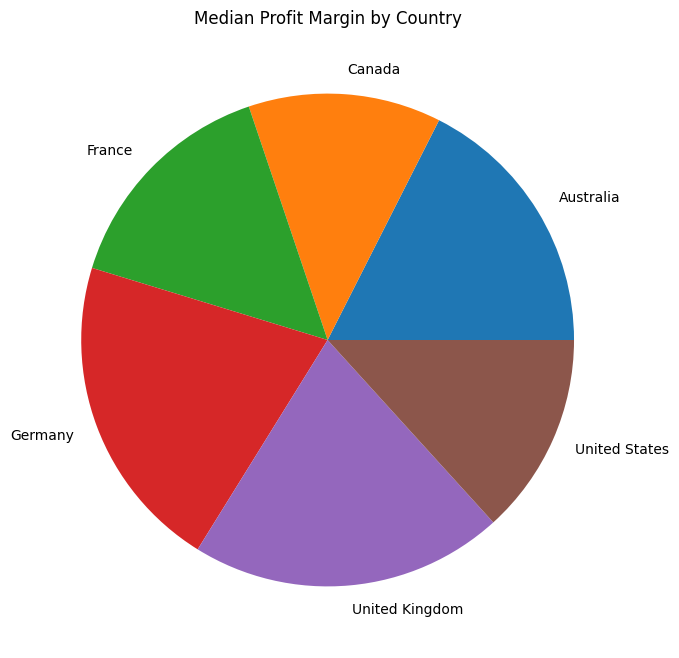

In [28]:
#Visual
import matplotlib.pyplot as plt

# Group by country and calculate median profit margin
sales_country = sales_data.groupby(['country'])['profit'].median()

# Create a pie chart of the median profit margin by country
sales_country.plot(kind='pie', figsize=(8, 8))

# Add a title and axis labels to the chart
plt.title('Median Profit Margin by Country')
plt.ylabel('')
plt.show()


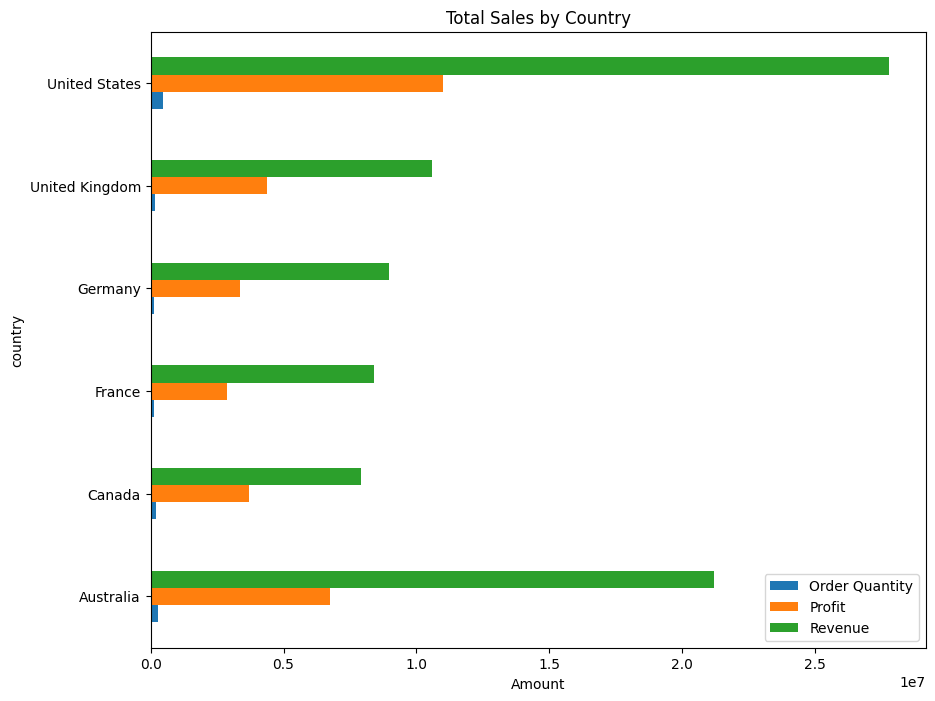

In [29]:
# Group by country and calculate sum of order quantity, profit, and revenue
sales_country_sum = sales_data.groupby(['country'])[['order_quantity', 'profit', 'revenue']].sum()

# Create a horizontal bar chart
ax = sales_country_sum.plot(kind='barh', figsize=(10,8))

# Add labels to the chart
ax.set_title('Total Sales by Country')
ax.set_xlabel('Amount')
ax.legend(['Order Quantity', 'Profit', 'Revenue'])

# Show the chart
plt.show()


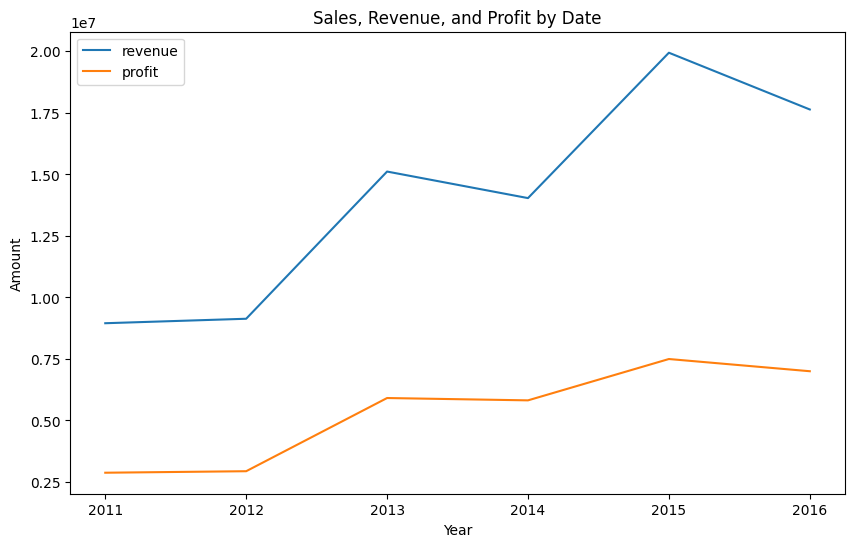

In [30]:
# Group by Year and calculate sum of revenue and profit
sales_by_date = sales_data.groupby('year')[['revenue', 'profit']].sum()

# Create a line chart
ax = sales_by_date.plot(kind='line', figsize=(10, 6))

# Add labels to the chart
ax.set_title('Sales, Revenue, and Profit by Date')
ax.set_xlabel('Year')
ax.set_ylabel('Amount')

# Show the chart
plt.show()


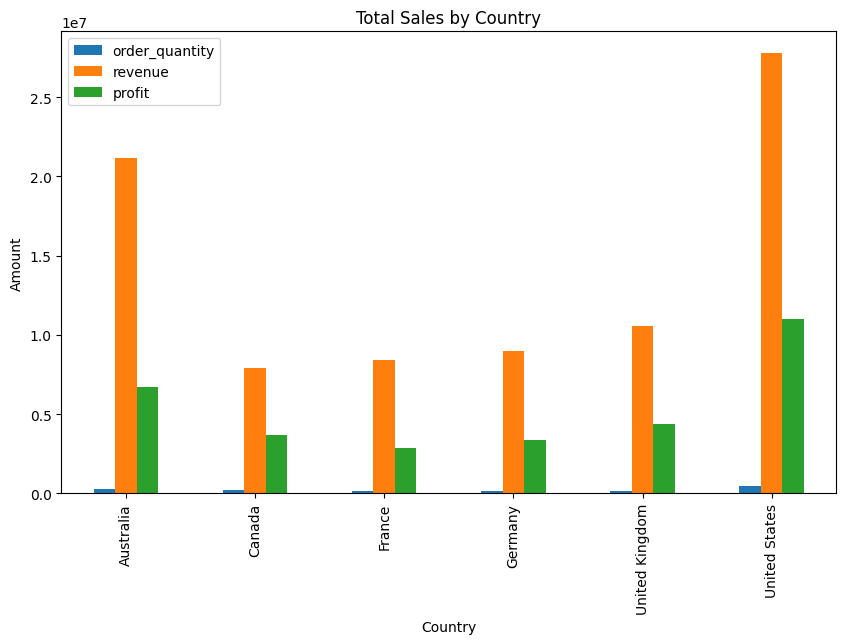

In [31]:
# Group by country and calculate sum of order quantity, profit, and revenue
sales_by_country = sales_data.groupby('country')[['order_quantity', 'revenue', 'profit']].sum()

# Create a bar chart
ax = sales_by_country.plot(kind='bar', figsize=(10, 6))

# Add labels to the chart
ax.set_title('Total Sales by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Amount')

# Show the chart
plt.show()


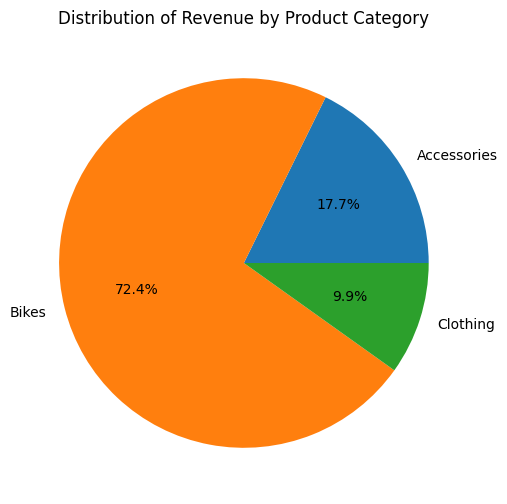

In [32]:
# Group by product category and calculate sum of revenue
sales_by_category = sales_data.groupby('product_category')['revenue'].sum()

# Create a pie chart
ax = sales_by_category.plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%')

# Add labels to the chart
ax.set_title('Distribution of Revenue by Product Category')
ax.set_ylabel('')

# Show the chart
plt.show()


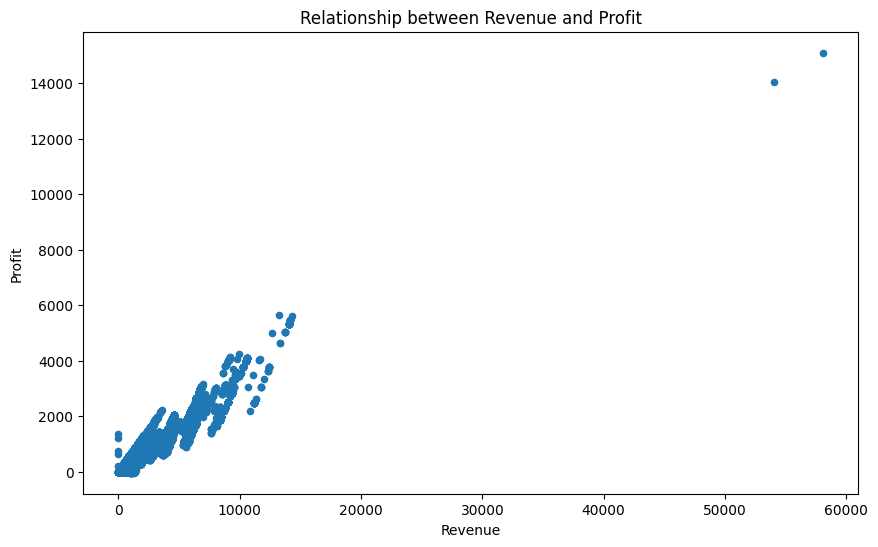

In [33]:
# Create a scatter plot of revenue vs. profit
ax = sales_data.plot(kind='scatter', x='revenue', y='profit', figsize=(10, 6))

# Add labels to the chart
ax.set_title('Relationship between Revenue and Profit')
ax.set_xlabel('Revenue')
ax.set_ylabel('Profit')

# Show the chart
plt.show()


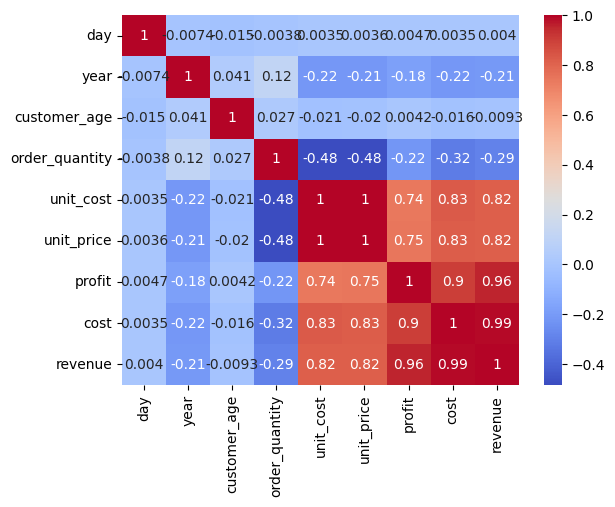

In [34]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = sales_data.corr(numeric_only=True)

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the chart
plt.show()


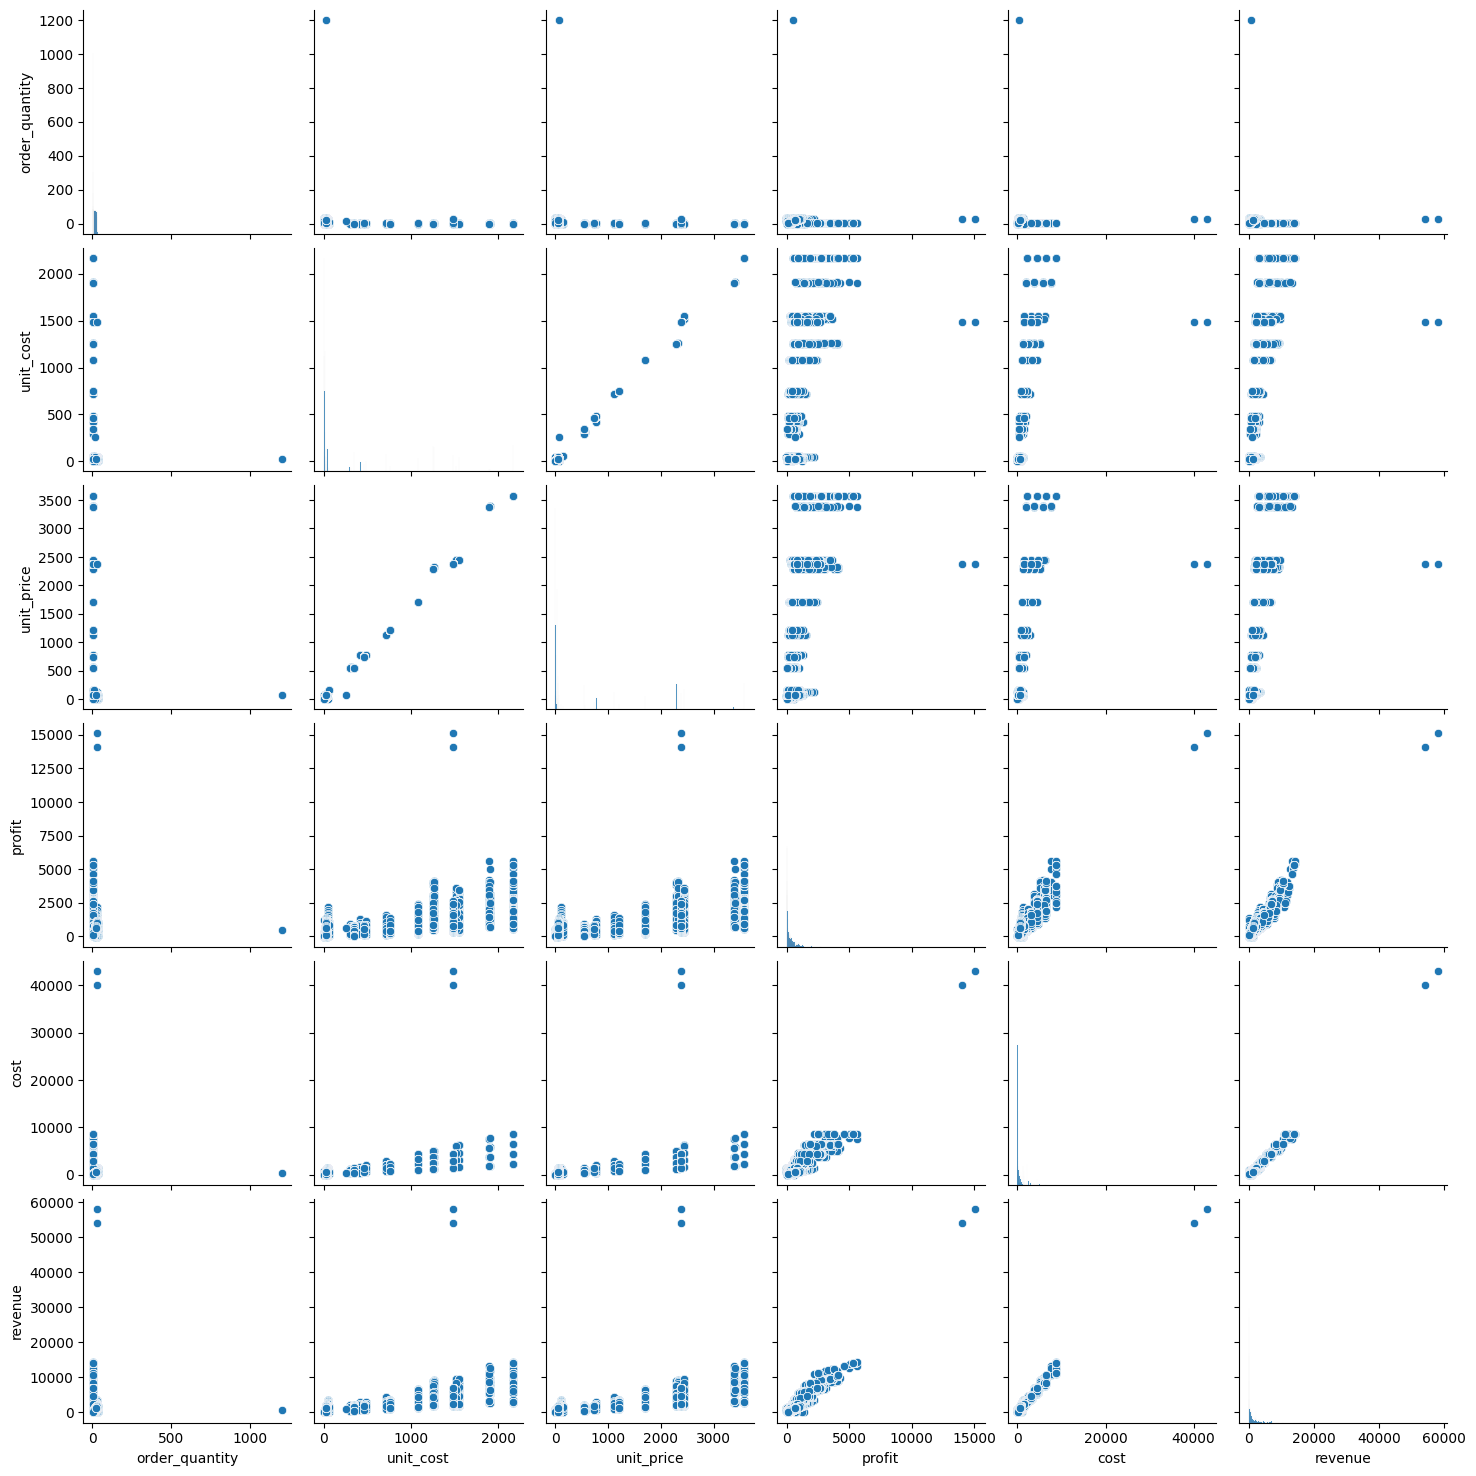

In [35]:
# Select the columns to include in the pairplot
cols = ['order_quantity', 'unit_cost', 'unit_price', 'profit', 'cost', 'revenue']

# Create a pairplot
sns.pairplot(sales_data[cols])
# Show the chart
plt.show()


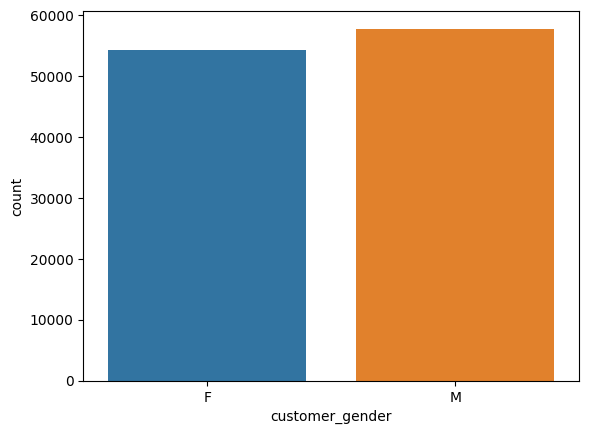

In [36]:
# Create a countplot of customer gender
sns.countplot(x='customer_gender', data=sales_data)

# Show the chart
plt.show()


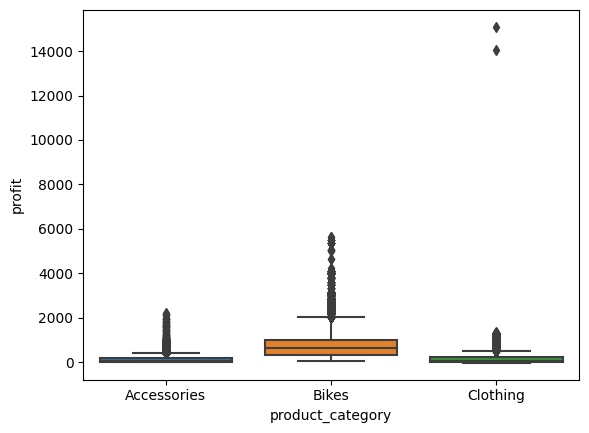

In [37]:
# Create a boxplot of profit by product category
sns.boxplot(x='product_category', y='profit', data=sales_data)

# Show the chart
plt.show()

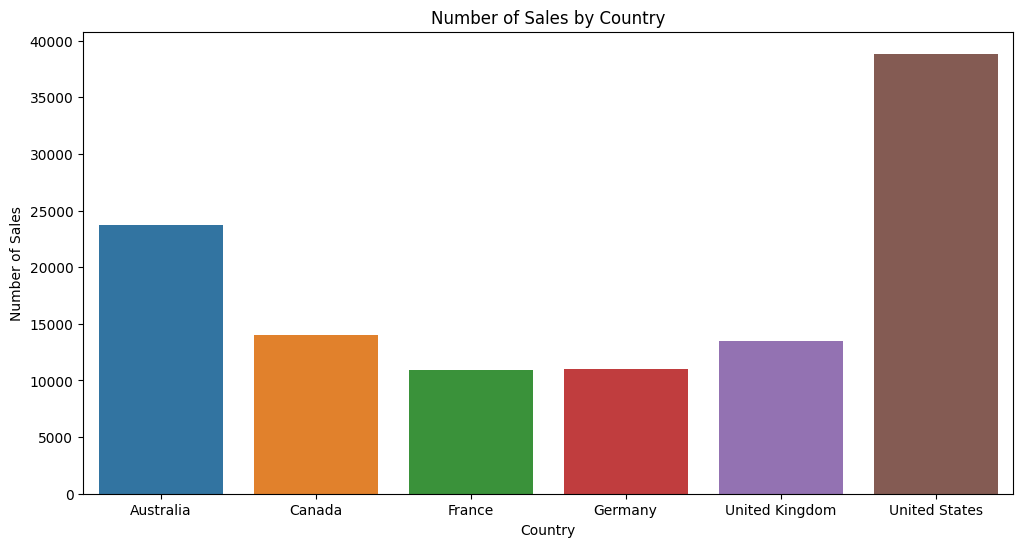

In [38]:
# Count of sales for each country
sales_country_count = sales_data.groupby(['country'])['order_quantity'].count()

# Create a bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=sales_country_count.index, y=sales_country_count.values)
plt.title('Number of Sales by Country')
plt.xlabel('Country')
plt.ylabel('Number of Sales')

plt.show()
